<a href="https://colab.research.google.com/github/AstrophyJimmy/1D_Harmonic_Oscillator_Solution_Simulation/blob/main/Classical_Harmonic_Oscillators_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# $$\mathcal{Toy\; Models\; of\; Solids }$$
## An Ode to Chapter 9 - Simon Book
## 1D Lattice Normal Modes
## Classical Harmonic Oscillators in a 1D Lattice


In [ ]:
from google.colab import files
import random as rand
from random import choice
from IPython.display import HTML
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='APJimmy'), bitrate=1800)


# 1D lattice
### Treating the n-atoms lattice as a collection of identical masses connected by an identical springs
> ## Considering cartesian coordinates with  origin at $x=0$

We define the position of the $j^{th}$ atom to be $x_j$ and its equilibrium position as $x_j^{eq}$

where $x_j^{eq} = x_j - ja$, 

$a$ being the lattice constant

And the deviation of $x_j$ from its equilibrium position is denoted by $\delta x_j$

> ## Now, we study the system mechanically using Newton's $2^{nd}$ Equation

Such that the atom $x_j$ is affected by a force due to $x_{j-1}$ atom from the left and $x_{j+1}$ atom from the right 

The system being at low temprature, the potential holding the atoms together is quadratic (from lennard-johns potential)

$$V_{tot} = \Sigma_j V(x_{j+1}-x_i) = \Sigma_j \frac{\kappa}{2}(x_{j+1}-x_j-a)^2 =  \Sigma_j \frac{\kappa}{2}(\delta x_{j+1} - \delta x_j)^2 $$

> ## The force on $x_j$

$$F_j = m(\delta \ddot x_j) = -\dfrac{\partial V_{tot}}{\partial x_j} = \kappa (\delta x_{j+1}-2\delta x_j + \delta x_{j-1})$$

using the ansatz that $ \delta x_j = A_j e^{i \omega t - i k x_n^{eq}} = A_j e^{i \omega t - i k ja } $

Now
$$ \dfrac{m\omega^2}{\kappa}(\delta x_i)= \kappa (\delta x_{i+1}-2\delta x_i + \delta x_{i-1})$$


>## Using Periodic Boundary Conditions

The left-hand side neighbor of $x_1$ is $x_n$
and the righ-hand side neighbor of $x_n$ is $x_1$

> we define the vector $\mathcal{A}$ whose elements are all $\delta x_i$ to be the state of the system

>Now it is possible to construct an eigenvalue problem whose eigenvalues will be the normal modes of the system

$$\mathcal{H A} = \dfrac{m\omega^2}{\kappa}\mathcal{A}$$

for convenience we take $m=\kappa=a=1$

># and we just solve the eigenvalue problem $$\mathcal{H A} = \omega^2\mathcal{A}$$



In [ ]:
m = 10 #Lattice Size
H = np.zeros((m,m))
for i in range(m):
  H[i,i]=-2
  if i == 0:
    H[i, m-1] = 1
    H[i, i+1] = 1
  elif i==m-1:
    H[i, i-1] = 1
    H[i, 0] = 1
  else:
    H[i, i+1] = 1
    H[i, i-1] = 1
from scipy.linalg import eig
values, vectors = eig(H)
vectors[0]

array([-0.31622777,  0.4472136 , -0.4472136 ,  0.4472136 ,  0.31622777,
        0.4472136 ,  0.02741044,  0.21224234, -0.01736312, -0.00623592])

In [ ]:
H

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [ ]:
#Sorting Eigenvalues and Eigenvectors
ind = values.argsort()[::-1]   
eigenValues = values[ind]
eigenVectors = vectors[:,ind]

# Here we show The Normal Mode of oscillation with the Highest frequency

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
n = m
fig, ax = plt.subplots(figsize=(15,6))
plt.close()

A = eigenVectors[-1]/ np.sqrt(np.sum(np.power(eigenVectors[-1],2)))

omega = np.sqrt(np.absolute(eigenValues[-1]))

ax.set_title(r'Normal Mode of Vibrations with $\omega=$'+str(omega), fontsize=15)
title = 'Normal Mode of Vibrations with omega='+str(omega)
k = 2 * np.arcsin(omega/2)

x = A + np.linspace(1,n,n)
#x = A
refX = np.copy(x)
y = [0]*n


def update1DLattice(t):
  global x, refX
  for nn in range(n):
    dx = np.cos(omega * t + k * (nn+1))
    x[nn] += dx


ax.set_xlim(( np.min(x)-1, np.max(x)+1))
ax.set_ylim((-1, 1))
ax.grid(alpha=0.2)

#ax.set_xticks(refX)
ax.set_yticks([0])
line, = ax.plot([], [], 'bo', ms=10, alpha =0.3 )

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    global x, y
    if i: update1DLattice(i)
    line.set_data(x, y)
    return (line,)
  
Nsteps = 100
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=Nsteps, interval=Nsteps, blit=True)

rc('animation', html='jshtml')

anim.save(title+'.mp4', writer=writer)  
files.download(title+'.mp4')
anim

In [ ]:
#Normalizing all of the eigenvectors
As = np.zeros((n,n))
for i in range(n): 
  As[i] = eigenVectors[i]/ np.sqrt(np.sum(np.power(eigenVectors[i],2)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
n = m
fig, ax = plt.subplots(figsize=(8,6))
plt.close()
title = 'Normal Mode of Vibrations'
ax.set_title(title, fontsize=15)

omegas = np.sqrt(np.absolute(eigenValues))
ks = 2 * np.arcsin(omegas/2)

refXs = np.linspace(1,n,n)
ys = np.meshgrid(refXs,refXs)[1]

xs = As + np.copy(refXs) 


def update1DLattice(t):
  global xs
  for nn in range(n):
    dx = np.cos(omega * t + ks * (nn+1))
    xs[nn] += dx


ax.set_xlim(( np.min(xs)-1, np.max(xs)+1))
ax.set_ylim((0, 11))
ax.grid(alpha=0.2)


ax.set_xticks(refXs)
ax.set_yticks(refXs)
ax.set_ylabel('Mode Number')

# ax2 = ax.twiny()
# omegasStrings = [str(np.round(o,4)) for o in omegas]
# ax2.set_yticks(refXs)
# ax2.set_yticklabels(omegasStrings)
# ax2.set_ylabel(r'$\omega$')

line, = ax.plot([], [], 'bo', ms=10, alpha = 0.3)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    global xs, ys
    if i: update1DLattice(i)
    line.set_data(xs, ys)
    return (line,)
  
Nsteps = 100
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=Nsteps, interval=Nsteps, blit=True)

rc('animation', html='jshtml')

anim.save(title+'.mp4', writer=writer)  
files.download(title+'.mp4')

anim

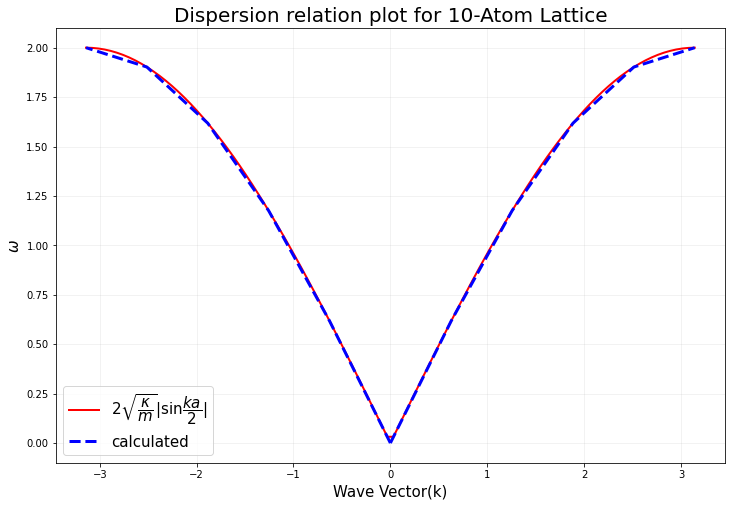

In [ ]:
kVector = np.linspace(-np.pi, np.pi,100)
fig = plt.figure(figsize =(12,8))
plt.title('Dispersion relation plot for '+str(m)+'-Atom Lattice',fontsize= 20)
plt.plot(kVector, 2*np.abs(np.sin(kVector/2)), color = 'r',lw = 2, ls = '-', label=r'$2 \sqrt{\dfrac{\kappa}{m}} |\sin{\dfrac{ka}{2}}|$')
plt.plot(ks, omegas,lw = 3, color = 'b', ls = '--', label = 'calculated')
plt.plot(-ks, omegas,lw = 3, color = 'b', ls = '--')
plt.xlabel('Wave Vector(k)',fontsize = 15)
plt.ylabel(r'$\omega$',fontsize = 15)
plt.legend(fontsize=15)
plt.grid(alpha=0.2)

[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in arcsin


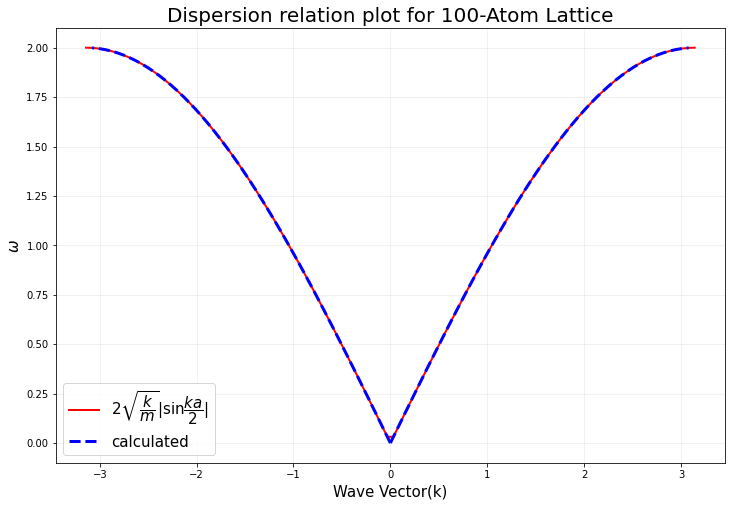

In [ ]:
m = 100 #Lattice Size
H = np.zeros((m,m))
for i in range(m):
  H[i,i]=-2
  if i == 0:
    H[i, m-1] = 1
    H[i, i+1] = 1
  elif i==m-1:
    H[i, i-1] = 1
    H[i, 0] = 1
  else:
    H[i, i+1] = 1
    H[i, i-1] = 1
print(H)
from scipy.linalg import eig
values, vectors = eig(H)

ind = values.argsort()[::-1]   
eigenValues = values[ind]
eigenVectors = vectors[:,ind]

omega = np.sqrt(np.absolute(eigenValues))
k = 2 * np.arcsin(omega/2)
fig = plt.figure(figsize =(12,8))
plt.title('Dispersion relation plot for '+str(m)+'-Atom Lattice',fontsize= 20)
plt.plot(kVector, 2*np.abs(np.sin(kVector/2)), color = 'r',lw = 2, ls = '-', label=r'$2 \sqrt{\dfrac{k}{m}} |\sin{\dfrac{ka}{2}}|$')
plt.plot(k, omega,lw = 3, color = 'b', ls = '--', label = 'calculated')
plt.plot(-k, omega,lw = 3, color = 'b', ls = '--')
plt.xlabel('Wave Vector(k)',fontsize = 15)
plt.ylabel(r'$\omega$',fontsize = 15)
plt.legend(fontsize=15)
plt.grid(alpha=0.2)